## Lecture Housekeeping:

- The use of disrespectful language is prohibited in the questions, this is a supportive, learning environment for all - please engage accordingly.
    - Please review Code of Conduct (in Student Undertaking Agreement) if unsure
- No question is daft or silly - ask them!
- There are Q&A sessions midway and at the end of the session, should you wish to ask any follow-up questions.
- Should you have any questions after the lecture, please schedule a mentor session.
- For all non-academic questions, please submit a query: [www.hyperiondev.com/support](www.hyperiondev.com/support)

## Data Formats

#### Learning objectives

   - Composition of XML and JSON files
   - CSV files
   - Manipulation of files


## Introduction

Before we can do any analysis, we need to obtain the data which can come from different sources. In this lecture, we will cover two types of data formats which you will need to be familiar with:

1. XML files
2. JSON files

## XML files

eXtensible Markup Language (XML) files are used to transmit data over the internet. XML files use a hierarchical structure consisting of elements, attributes, and text content. Elements can be nested within each other, forming a tree structure that represents the relationship between the data components.

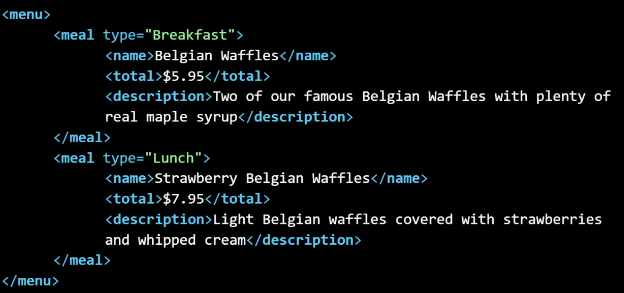


## JSON files

JSON stands for JavaScript Object Notation. The syntax for a JSON object looks like a Python dictionary. It is a key-value structure enclosed with curly braces.The key-value structure is a data structure that uses an associative array of keys, where each key is associated with only one value in a collection.

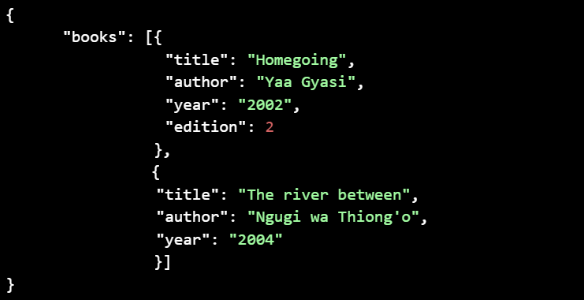


## CSV files

Comma Separated Values (CSV) files are used for exchanging large chunks of data between systems. CSV files are widely supported. Many spreadsheet programs and programming languages support CSV files.

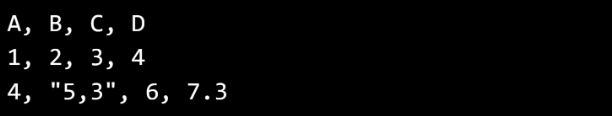

 - Two-dimensional structure containing rows of data
 - Each row contains cells 
 - The cells within a row are separated by commas
 - Note the value with the double quotation marks: we want the computer to disregard the comma inside the quotation marks and read it as one value



## XML File Manipulation

In this demo, we will go over some common ways we manipulate and work with XML files. We will use the menu file shown earlier.

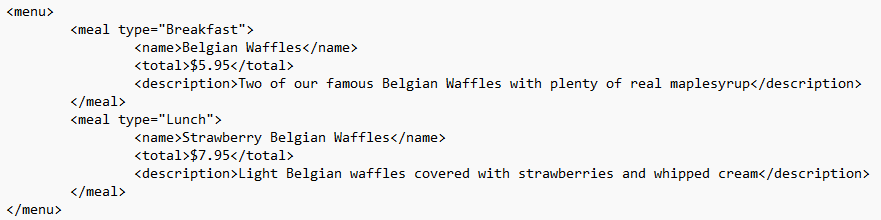

In [1]:
# Read the XML file
import xml.etree.ElementTree as ET

# Create the tree
tree = ET.parse('menu.xml')

# Create a root
root = tree.getroot()
print(root)

<Element 'menu' at 0x000001E262E72CF0>


In [2]:
print(root.tag)

menu


In [3]:
print(root.attrib)

{}


In [4]:
for child in root:
    print(child.tag, child.attrib)

meal {'type': 'Breakfast'}
meal {'type': 'Lunch'}


In [5]:
# Extracting data
for meal in root.findall('.//meal'):
    name = meal.find('name').text
    description = meal.find('description').text
    print(f"Name: {name}\nDescription: {description}\n")

Name: Belgian Waffles
Description: Two of our famous Belgian Waffles with plenty of 
real maple syrup

Name: Strawberry Belgian Waffles
Description: Light Belgian waffles covered with strawberries 
and whipped cream



In [6]:
# Adding new data
new_meal = ET.Element('meal', {'type': 'Dinner'})
name = ET.SubElement(new_meal, 'name')
name.text = 'Steak and Potatoes'
total = ET.SubElement(new_meal, 'total')
total.text = '$14.95'
description = ET.SubElement(new_meal, 'description')
description.text = 'Juicy steak with mashed potatoes'

root.append(new_meal)

# Extract all data in menu
for meal in root.findall('.//meal'):
    name = meal.find('name').text
    description = meal.find('description').text
    print(f"Name: {name}\nDescription: {description}\n")

Name: Belgian Waffles
Description: Two of our famous Belgian Waffles with plenty of 
real maple syrup

Name: Strawberry Belgian Waffles
Description: Light Belgian waffles covered with strawberries 
and whipped cream

Name: Steak and Potatoes
Description: Juicy steak with mashed potatoes



In [7]:
# Delete data
for meal in root.findall('.//meal'):
    if meal.find('name').text == 'Strawberry Belgian Waffles':
        root.remove(meal)

# Extracting data
for meal in root.findall('.//meal'):
    name = meal.find('name').text
    description = meal.find('description').text
    print(f"Name: {name}\nDescription: {description}\n")

Name: Belgian Waffles
Description: Two of our famous Belgian Waffles with plenty of 
real maple syrup

Name: Steak and Potatoes
Description: Juicy steak with mashed potatoes



In [9]:
# Modifying data
for meal in root.findall('.//meal'):
    if meal.find('name').text == 'Belgian Waffles':
        meal.find('total').text = '$6.95'

# Extracting data
for meal in root.findall('.//meal'):
    name = meal.find('name').text
    total = meal.find('total').text
    print(f"Name: {name}\nTotal: {total}\n")

Name: Belgian Waffles
Total: $6.95

Name: Steak and Potatoes
Total: $14.95

